## Load Data

In [1]:
import tarfile,sys
import pandas as pd
import os
import simplejson
import re as regex
 
def untar(fname):
    if (fname.endswith("tar") or fname.endswith("tgz") ):
        tar = tarfile.open(fname)
        tar.extractall()
        tar.close()
        print "Extracted in Current Directory"
    else:
        print "Not a tar.gz file: '%s '" % sys.argv[0]

In [2]:
untar('shared_task_data.tar')

Extracted in Current Directory


In [4]:
for i in range(60,89): 
    fpath='final_testing_data/'+str(i)+'.tgz'
    untar(fpath)

Extracted in Current Directory
Extracted in Current Directory
Extracted in Current Directory
Extracted in Current Directory
Extracted in Current Directory
Extracted in Current Directory
Extracted in Current Directory
Extracted in Current Directory
Extracted in Current Directory
Extracted in Current Directory
Extracted in Current Directory
Extracted in Current Directory
Extracted in Current Directory
Extracted in Current Directory
Extracted in Current Directory
Extracted in Current Directory
Extracted in Current Directory
Extracted in Current Directory
Extracted in Current Directory
Extracted in Current Directory
Extracted in Current Directory
Extracted in Current Directory
Extracted in Current Directory
Extracted in Current Directory
Extracted in Current Directory
Extracted in Current Directory
Extracted in Current Directory
Extracted in Current Directory
Extracted in Current Directory


In [5]:
userInfo=pd.read_csv('anonymized_user_info_by_chunk.csv')

## Function to extract features

In [6]:
def add_first_person(temp):
    import numpy as np
    #first person 
    first =  ["i", "i'd", "i'll", "i'm", "i've", "me", "my"]
    temp['firstperson'] =temp['text'].str.lower().str.split()
    count_fp = 0
    for i in temp['text']:
        count_fp += len(set(i) & set(first))
    temp['firstperson'] = count_fp
    
#tsugawa_terms 
def tsugawag(temp):
    tsugawa_terms = ["even if", "low fever", "very", "workplace", "hopeless", "disappear", "too much", "sickness", "bad", "hospital"]
    temp_words =temp['text'].str.lower().str.split()
    count_tsugawa = 0
    for i in temp['text']:
        count_tsugawa += len(set(i) & set(tsugawa_terms))
    count_final = count_tsugawa/len(temp["text"])
    temp['tsugawa'] = count_final
    
def avg_sentiment(temp):
    from textblob import TextBlob
    avg = 0
    for i in temp['text']:
        blob = TextBlob(i)
        sentiment = blob.sentiment.polarity
        avg += sentiment
    avg_sentiment = avg / len(temp['text'])
    temp['avgsentiment'] = avg_sentiment

def get_all_tweets(temp):
    all_text = ""
    for i in temp['text']:
        all_text+=i
    temp['tweet'] = all_text
    #print(all_text)

def count_by_lambda(expression, word_array):
    return len(list(filter(expression, word_array)))

def count_occurences(character, word_array):
    counter = 0
    for j, word in enumerate(word_array):
        for char in word:
            if char == character:
                counter += 1

    return counter

def count_by_regex(regex, plain_text):
    return len(regex.findall(plain_text))


def add_columns_punctuations(temp):
    temp["splitted_text"] = map(lambda txt: txt.split(" "), temp["text"])
    # number of uppercase words
    uppercase = list(map(lambda txt: count_by_lambda(lambda word: word == word.upper(), txt),temp["splitted_text"]))
       
    temp["number_of_uppercase"] =  uppercase

    # number of !
    exclamations = list(map(lambda txt: count_occurences("!", txt),temp["splitted_text"]))

    temp["number_of_exclamation"] = exclamations

    # number of ?
    questions = list(map(lambda txt: count_occurences("?", txt),temp["splitted_text"]))

    temp["number_of_question"] = questions

    # number of ...
    ellipsis = list(map(lambda txt: count_by_regex(regex.compile(r"\.\s?\.\s?\."), txt),temp["text"]))

    temp["number_of_ellipsis"] = ellipsis

## Load all tweets with the above features and construct a big feature matrix

In [7]:
columns = ['class','user_name','id','tweet','avgsentiment', 'favorite_count', 'firstperson','geo','possibly_sensitive','retweet_count','retweeted','tsugawa','number_of_uppercase','number_of_exclamation','number_of_question','number_of_ellipsis']
data=pd.DataFrame(columns=columns)
for index, row in userInfo.iterrows():
    user=row['anonymized_screen_name']+'.tweets'
    if os.path.isfile(user): 
        print 'Reading file '+user
        try: 
            temp=pd.read_json(str(user), lines=True)
            add_first_person(temp)
            tsugawag(temp)
            avg_sentiment(temp)
            get_all_tweets(temp)
            add_columns_punctuations(temp)
            temp['user_name'] = row['anonymized_screen_name']
            temp['class'] = row['condition']
            final_temp = temp[columns]
            if data.empty:
                data=final_temp.loc[0:0]
            else:
                data = data.append(final_temp.loc[0:0])
        except:
            print "Bad File!"

Reading file fXCRq_fHY54q.tweets
Reading file eCNWCxVPBd6X.tweets
Reading file fQMG3CPGRM4aJE.tweets
Reading file s4eQYRu.tweets
Reading file fJMGNFC5OayrPai.tweets
Reading file q_NHBlTvk8zSI.tweets
Reading file rsUAt84aQGhH.tweets
Reading file fVAENuW.tweets
Reading file mf_ltS0y5a.tweets
Reading file wHA9T2j5HD.tweets
Reading file uytPRMEb2m_MfoP.tweets
Bad File!
Reading file ir8Bk3sD1.tweets
Reading file vDBaHkE6j_8a0.tweets
Reading file oKlAzbYrDoryT.tweets
Reading file qiPKnAbToGq_q7.tweets
Reading file rGbLj5B_oiNmp3.tweets
Reading file wTOL9Kcsu.tweets
Reading file u8WjUnsvOufc.tweets
Reading file koeB85hE_3Cs4.tweets
Reading file iAGFXQK5R5.tweets
Reading file xjwWZsrrk19Sg6y.tweets
Reading file cjLPCjlpHQh6T.tweets
Reading file o7tCIf1YoHhfP.tweets
Reading file xApwCLbrTp.tweets
Bad File!
Reading file r7BBVJEBbz1k.tweets
Reading file saQMlGT7uV8.tweets
Reading file t5JUY_2XpbXAiyE.tweets
Reading file sgh85pBVTrOI5.tweets
Bad File!
Reading file tAQYn265.tweets
Reading file j15O

Reading file xaesSFZQD7AL.tweets
Reading file bNdT5_veMfGsAs.tweets
Reading file FBMkcAgLjVQr.tweets
Reading file qcT_GzQexkzeW.tweets
Reading file p_plIBI1_ks7WkS.tweets
Reading file fF6x3_RgbYpP02.tweets
Reading file giJ6PRm0JsWU.tweets
Reading file svmbzMqi32vO.tweets
Reading file vLKtCiJS6Z.tweets
Reading file kKGyBjM0H7.tweets
Reading file fbVLic8hDLa3nk.tweets
Reading file xrVALfx9xP5n_T.tweets
Reading file gUAU9LqzZYO_EM7.tweets
Reading file XpA5fJzijJeJeP7.tweets
Reading file cPm3rHzUclpFNKU.tweets
Bad File!
Reading file h6jxnEUtkg9.tweets
Reading file neRiNol8rrSZ.tweets
Reading file o4J1FAhJRc3l.tweets
Reading file lJ5zuzOox3R.tweets
Reading file vctzYPWi3eq_1bk.tweets
Bad File!
Reading file ntoNO5fTDPAMIG.tweets
Bad File!
Reading file voFnOuemYVotyD.tweets
Reading file felWNZDk4Is1.tweets
Reading file lGcy8QQdA6QufLj.tweets
Reading file jo8BzLvlIJKY.tweets
Reading file qfVCd2h4Z2UZ.tweets
Reading file bQxEV6egkt8ugpx.tweets
Reading file eiY1CHivb.tweets
Reading file izmgP7.t

Reading file qAaZoQtW.tweets
Reading file sqOFbJ0CQYM.tweets
Reading file iu5gU8ghxyKvU.tweets
Reading file wuwHUfST.tweets
Reading file o7y8mOJmu7X.tweets
Reading file mNygtGYLK5YL70.tweets
Reading file x_c8U_leKl.tweets
Reading file piWh3Ghpr.tweets
Reading file v8URUS5iaGQRWS.tweets
Reading file tPSKBQR7d.tweets
Reading file nUhSItKZTzlmF.tweets
Reading file lPf3ryh8iCp48rX.tweets
Reading file tLCucLjaBx.tweets
Bad File!
Reading file vqzZo5fUnE.tweets
Bad File!
Reading file pOfYbxN5YjZxDP_.tweets
Reading file mj450tbokZZ2gEb.tweets
Reading file oJBPb_pNHn27Tts.tweets
Reading file iemR45d6t.tweets
Reading file puQ8jNoUobokH.tweets
Bad File!
Reading file bKBncyk3Tc_.tweets
Reading file vQGEuYiO.tweets
Reading file dhzwZIL.tweets
Reading file cHhBk3HUsVO1.tweets
Reading file sGZCBj9dr.tweets
Reading file mwBvS5L8rx.tweets
Bad File!
Reading file nXQh3sJyv5cPIHc.tweets
Reading file vI34Id.tweets
Reading file niFVCWZru9sCi.tweets
Reading file b_59E32iy.tweets
Reading file xYq37QKUhsv7.twe

## Store Feature Matrix to CSV files to not repeat multiple times

In [10]:
data.to_csv('test', encoding='utf-8')
data.to_csv('train', encoding='utf-8')

## Read from CSV file containing features

In [2]:
testdata = pd.read_csv('test.csv')
traindata = pd.read_csv('train.csv')

## Clean Up data

In [3]:
def remove_by_regex(tweets, regexp):
    tweets.loc[:, "tweet"].replace(regexp, "", inplace=True)
    return tweets

def remove_urls(tweets):
    return remove_by_regex(tweets, regex.compile(r"http.?://[^\s]+[\s]?"))

def remove_na(tweets):
    return tweets[tweets["tweet"] != "Not Available"]

def remove_special_chars(tweets):  # it unrolls the hashtags to normal words
    for remove in map(lambda r: regex.compile(regex.escape(r)), [",", ":", "\"", "=", "&", ";", "%", "$",
                                                                 "@", "%", "^", "*", "(", ")", "{", "}",
                                                                 "[", "]", "|", "/", "\\", ">", "<", "-",
                                                                 "!", "?", ".", "'",
                                                                 "--", "---", "#"]):
        tweets.loc[:, "tweet"].replace(remove, "", inplace=True)
    return tweets

def remove_usernames(tweets):
    return remove_by_regex(tweets, regex.compile(r"@[^\s]+[\s]?"))

def remove_numbers(tweets):
    return remove_by_regex(tweets, regex.compile(r"\s?[0-9]+\.?[0-9]*"))

## Train Data

In [4]:
data = traindata
data = remove_urls(data)
data = remove_na(data)
data = remove_special_chars(data)
data = remove_usernames(data)
data = remove_numbers(data)
#data.cleanup(TwitterCleanuper())
data.head(5)

,Unnamed: 0,class,user_name,id,tweet,avgsentiment,favorite_count,firstperson,geo,possibly_sensitive,retweet_count,retweeted,tsugawa,number_of_uppercase,number_of_exclamation,number_of_question,number_of_ellipsis
0,0,depression,p1oWIeRy95,3858261610217213963,baLKoKrkpq goodnight chicken strip i love you ...,0.354754,1,2227,NaN,NaN,0,False,0,1,0,0,0
1,0,control,u6Q1cPYaegBS,3270683617599762436,Dinner wth my gals yeeeeyyykPctsovdlz jxXTU ha...,0.155586,0,645,NaN,NaN,0,False,0,0,2,0,0
2,0,control,cpZb1zL,5787167597109857946,Ask me a question are you wearing right now —...,0.085559,0,367,NaN,0.0,0,False,0,1,0,0,0
3,0,depression,nC8trwq,4258046557791254797,RT pvuoFhN Being a gentleman never goes out of...,0.092761,0,2222,NaN,NaN,210,False,0,1,0,0,0
4,0,control,mbKpnEfzJFe,9036456942659112671,RT nTKPMGGud An intelligent man is so attracti...,0.114935,0,2431,NaN,NaN,3,False,0,2,0,0,0


## Test Data

In [5]:
data_test = testdata
data_test = remove_urls(data_test)
data_test = remove_na(data_test)
data_test = remove_special_chars(data_test)
data_test = remove_usernames(data_test)
data_test = remove_numbers(data_test)
#data.cleanup(TwitterCleanuper())
data_test.head(5)

,Unnamed: 0,class,user_name,id,tweet,avgsentiment,favorite_count,firstperson,geo,possibly_sensitive,retweet_count,retweeted,tsugawa,number_of_uppercase,number_of_exclamation,number_of_question,number_of_ellipsis
0,0,depression,fXCRq_fHY54q,1851448512820257054,kbBabQXhvn 😂😂😂😂RT iElRfD animals are friends n...,0.034836,1,2337,NaN,NaN,0,False,0,1,0,0,0
1,0,control,eCNWCxVPBd6X,2359000954448895640,Kelly and I gonna blaze it b prom bZrwzAwVMVT ...,0.087764,0,1193,NaN,0.0,0,False,0,1,0,0,0
2,0,ptsd,fQMG3CPGRM4aJE,658642101307826787,Look how big theyve gotten since I last tweete...,0.058376,0,2773,NaN,0.0,0,False,0,1,1,0,0
3,0,control,s4eQYRu,6726888393985369307,All grumpy and cant get comfy grumpycow bleur...,0.164804,0,296,NaN,NaN,0,False,0,1,0,0,0
4,0,ptsd,fJMGNFC5OayrPai,436962694770319314,Maybe the future ahead of you isnt necessarily...,0.156489,0,2896,NaN,NaN,0,False,0,0,0,0,0


## Tokenize Words, Remove Stop Words, Lemmatize

In [6]:
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
def clean_data(ingredients):
    lmtzr = WordNetLemmatizer()
    def split_word(strOfWords):
        #print(strOfWords)
        tempWords  = []
        toRemove  = []
        for word in strOfWords.split():
            word = "".join(x for x in word if x.isalpha())
            word = "".join(lmtzr.lemmatize(word))
            if word.lower() not in toRemove:
                 tempWords.append(word)
        return tempWords
    return [split_word(y) for y in ingredients]

## Train Data CleanUp

In [7]:
data["tweet"]= clean_data(data["tweet"])

In [8]:
data["total_words"] = data["tweet"].map(",".join)
data["total_words"] = data["total_words"].str.strip()

In [9]:
# Remove Na and change False to a number
data = data.fillna(0)
data.shape
data.drop('id', axis=1)
data['retweeted'] = data['retweeted']*1
data

,Unnamed: 0,class,user_name,id,tweet,avgsentiment,favorite_count,firstperson,geo,possibly_sensitive,retweet_count,retweeted,tsugawa,number_of_uppercase,number_of_exclamation,number_of_question,number_of_ellipsis,total_words
0,0,depression,p1oWIeRy95,3858261610217213963,"[baLKoKrkpq, goodnight, chicken, strip, i, lov...",0.354754,1,2227,0.0,0.0,0,0,0,1,0,0,0,"baLKoKrkpq,goodnight,chicken,strip,i,love,you,..."
1,0,control,u6Q1cPYaegBS,3270683617599762436,"[Dinner, wth, my, gal, yeeeeyyykPctsovdlz, jxX...",0.155586,0,645,0.0,0.0,0,0,0,0,2,0,0,"Dinner,wth,my,gal,yeeeeyyykPctsovdlz,jxXTU,hah..."
2,0,control,cpZb1zL,5787167597109857946,"[Ask, me, a, question, are, you, wearing, righ...",0.085559,0,367,0.0,0.0,0,0,0,1,0,0,0,"Ask,me,a,question,are,you,wearing,right,now,,M..."
3,0,depression,nC8trwq,4258046557791254797,"[RT, pvuoFhN, Being, a, gentleman, never, go, ...",0.092761,0,2222,0.0,0.0,210,0,0,1,0,0,0,"RT,pvuoFhN,Being,a,gentleman,never,go,out,of,s..."
4,0,control,mbKpnEfzJFe,9036456942659112671,"[RT, nTKPMGGud, An, intelligent, man, is, so, ...",0.114935,0,2431,0.0,0.0,3,0,0,2,0,0,0,"RT,nTKPMGGud,An,intelligent,man,is,so,attracti..."
5,0,control,cMwx3Gi9RuskPTa,2135526198652413743,"[RT, ewczqMHQWKora, Wash, the, dirt, off, and,...",0.094152,0,1835,0.0,0.0,3,0,0,1,0,0,0,"RT,ewczqMHQWKora,Wash,the,dirt,off,and,shine,o..."
6,0,depression,gnau5VYmZon,9109593059979792776,"[mSUtZcqIwBk, praying, for, her, safe, returnR...",0.241591,1,2620,0.0,0.0,0,0,0,0,1,0,0,"mSUtZcqIwBk,praying,for,her,safe,returnRT,mSUt..."
7,0,control,w5zZbsisYcaA,5554764028281426930,"[Today, stats, One, follower, No, unfollowers,...",0.201830,0,659,0.0,0.0,0,0,0,0,0,0,0,"Today,stats,One,follower,No,unfollowers,via,st..."
8,0,ptsd,iBjhOmD,1008160895688102822,"[RT, gzLMrKgTFHn, Today, is, the, day, lowest,...",0.149238,0,2554,0.0,0.0,3,0,0,2,2,0,0,"RT,gzLMrKgTFHn,Today,is,the,day,lowest,rate,fo..."
9,0,control,q69HY7gQXtabz,5692898157399754606,"[MondayBlogs, You, Owe, It, To, Your, Readers,...",0.167659,3,2697,0.0,0.0,9,0,0,1,1,0,0,"MondayBlogs,You,Owe,It,To,Your,Readers,To,Be,I..."


In [75]:
## This class label should not be present. Ensure its removal. Bug in IRB data
import numpy as np
data[data['class'] == 'condition']
data = data.drop(613)
data[data['class'] == 'condition']

,Unnamed: 0,class,user_name,id,tweet,avgsentiment,favorite_count,firstperson,geo,possibly_sensitive,retweet_count,retweeted,tsugawa,number_of_uppercase,number_of_exclamation,number_of_question,number_of_ellipsis,total_words


## Test Data Cleanup

In [10]:
data_test["tweet"]= clean_data(data_test["tweet"])
data_test["total_words"] = data_test["tweet"].map(",".join)
data_test["total_words"] = data_test["total_words"].str.strip()
# Remove Na and change False to a number
data_test = data_test.fillna(0)
data_test.shape
data_test.drop('id', axis=1)
data_test['retweeted'] = data_test['retweeted']*1
data_test
   

,Unnamed: 0,class,user_name,id,tweet,avgsentiment,favorite_count,firstperson,geo,possibly_sensitive,retweet_count,retweeted,tsugawa,number_of_uppercase,number_of_exclamation,number_of_question,number_of_ellipsis,total_words
0,0,depression,fXCRq_fHY54q,1851448512820257054,"[kbBabQXhvn, RT, iElRfD, animal, are, friend, ...",0.034836,1,2337,0.0,0.0,0,0,0,1,0,0,0,"kbBabQXhvn,RT,iElRfD,animal,are,friend,not,foo..."
1,0,control,eCNWCxVPBd6X,2359000954448895640,"[Kelly, and, I, gonna, blaze, it, b, prom, bZr...",0.087764,0,1193,0.0,0.0,0,0,0,1,0,0,0,"Kelly,and,I,gonna,blaze,it,b,prom,bZrwzAwVMVT,..."
2,0,ptsd,fQMG3CPGRM4aJE,658642101307826787,"[Look, how, big, theyve, gotten, since, I, las...",0.058376,0,2773,0.0,0.0,0,0,0,1,1,0,0,"Look,how,big,theyve,gotten,since,I,last,tweete..."
3,0,control,s4eQYRu,6726888393985369307,"[All, grumpy, and, cant, get, comfy, grumpycow...",0.164804,0,296,0.0,0.0,0,0,0,1,0,0,0,"All,grumpy,and,cant,get,comfy,grumpycow,bleurg..."
4,0,ptsd,fJMGNFC5OayrPai,436962694770319314,"[Maybe, the, future, ahead, of, you, isnt, nec...",0.156489,0,2896,0.0,0.0,0,0,0,0,0,0,0,"Maybe,the,future,ahead,of,you,isnt,necessarily..."
5,0,control,q_NHBlTvk8zSI,6862447630180591834,"[RT, riffLMsUD, Your, past, mistake, are, mean...",0.162941,0,1694,0.0,0.0,140,0,0,1,0,0,0,"RT,riffLMsUD,Your,past,mistake,are,meant,to,gu..."
6,0,ptsd,rsUAt84aQGhH,3213788754664869211,"[Ooooo, whats, your, sweater, made, out, of, h...",0.023937,0,1079,0.0,0.0,0,0,0,0,0,1,1,"Ooooo,whats,your,sweater,made,out,of,hun,Side,..."
7,0,control,fVAENuW,5963476101050828581,"[Chris, Breezy, hate, him, Or, love, Young, Ni...",0.112551,0,2663,0.0,0.0,0,0,0,0,1,0,0,"Chris,Breezy,hate,him,Or,love,Young,Nikka,is,B..."
8,0,depression,mf_ltS0y5a,5092438532978881906,"[RT, gCoamBaFAU, Im, that, douchebag, friend, ...",0.084578,0,288,0.0,0.0,653,0,0,1,0,0,0,"RT,gCoamBaFAU,Im,that,douchebag,friend,who,doe..."
9,0,control,wHA9T2j5HD,73518555983737372,"[Why, yall, sleep, Ima, be, maken, money, jqhk...",0.042497,0,2205,0.0,0.0,0,0,0,0,0,0,0,"Why,yall,sleep,Ima,be,maken,money,jqhkWszMkaqH..."


In [77]:
import numpy as np
data_test[data_test['class'] == 'condition']
# data = data.drop(613)
# data[data['class'] == 'condition']

,Unnamed: 0,class,user_name,id,tweet,avgsentiment,favorite_count,firstperson,geo,possibly_sensitive,retweet_count,retweeted,tsugawa,number_of_uppercase,number_of_exclamation,number_of_question,number_of_ellipsis,total_words


## CountVectorizer

In [16]:
def wordTokenizer(text):
    return text.split(",")
#Use count vectorizer to create X = n*d where n = number of samples, d=dishes. 
cv = CountVectorizer(stop_words="english",lowercase=True,tokenizer=wordTokenizer,token_pattern="[A-Za-z]*",strip_accents='ascii',vocabulary=None)
X = cv.fit_transform(data["total_words"].values)
print("Unique ingredients after data cleaning: ", X.shape)

('Unique ingredients after data cleaning: ', (1002, 1607308))


In [17]:
## Test Data Transform
X_test = cv.transform(data_test["total_words"].values)

## TF-IDF Vectorizer

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
def wordTokenizer(text):
    return text.split(",")
vectorizer = TfidfVectorizer(min_df=5, max_df = 0.8, sublinear_tf=True, use_idf=True,stop_words='english', lowercase=True,tokenizer=wordTokenizer,token_pattern="[A-Za-z]*",strip_accents='ascii',vocabulary=None)
train_corpus_tf_idf = vectorizer.fit_transform(data["total_words"].values) 

In [79]:
print("Unique tokens", train_corpus_tf_idf.shape)
X = train_corpus_tf_idf

('Unique tokens', (1001, 68785))


In [80]:
## Test Data Transform
test_corpus_tf_idf = vectorizer.transform(data_test["total_words"].values)
X_test = test_corpus_tf_idf

## Add features to the word vectors

In [81]:
from scipy.sparse import csr_matrix
import scipy.sparse as sparse
t = data.iloc[:,5:16]
t = sparse.csr_matrix(t)
print(t.shape)
X_new = sparse.hstack((X,t))
print(X_new.shape)

(1001, 11)
(1001, 68796)


In [82]:
t = data_test.iloc[:,5:16]
t = sparse.csr_matrix(t)
X_new_test = sparse.hstack((X_test,t))

In [83]:
print(X_new_test.shape)

(470, 68796)


## Encode Labels 

In [84]:
from sklearn.preprocessing import LabelEncoder
crisisEncoder = LabelEncoder()
y = crisisEncoder.fit_transform(data['class'])
y_test = crisisEncoder.transform(data_test['class'])

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log = cross_val_score(LogisticRegression(), X_new, y,cv=3)
print("Logisitic regression average accuracy : ",log.mean())

In [85]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_new, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [86]:
np.unique(y)
crisisEncoder.classes_

array(['control', 'depression', 'ptsd'], dtype=object)

## Analyze top words for Depression

In [209]:
import numpy as np
print(np.max(np.abs(logreg.coef_)))
coef = logreg.coef_
print(type(coef))
print(coef.shape)
ind = np.argpartition(coef[1], -20)[-20:]
ind = ind[np.argsort(coef[1][ind])]
vocab = vectorizer.vocabulary_
names = []
for name, index in vocab.items():    # for name, age in list.items():  (for Python 3.x)
    if index in ind:
        names.append(name)

1.7152721596243306
<type 'numpy.ndarray'>
(3, 68796)


In [210]:
## Delete unwanted word
# print(names)
# del names[-1]
# test = list(coef[1][ind])
# del test[-1]
# #print(test)

[u'fucking', u'anxiety', u'fandom', u'depression', u'account', u'fuck', u'gsuaoruszv', u'suicidal', u'harry', u'depressed', u'suicide', u'ship', u'omfg', u'idk', u'diagnosed', u'bae', u'louis', u'dm', u'rtfav', u'rqhusgweevi']


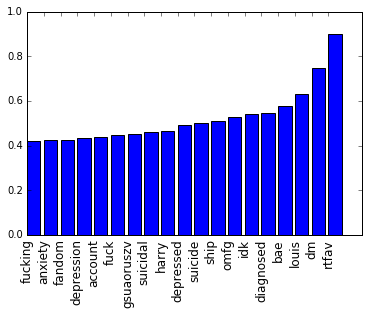

In [211]:
import matplotlib.pyplot as plt
x_ticks_labels = names
fig, ax = plt.subplots(1,1) 
ax.bar(range(len(names)),test)
ax.set_xticks(range(len(names)))
# Set ticks labels for x-axis
ax.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=12)
plt.savefig('depressed', bbox_inches='tight')

## Analyze Top Words for PTSD

<type 'numpy.ndarray'>
(3, 68796)
20


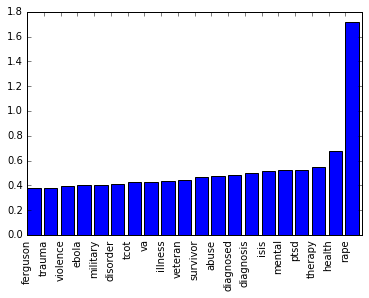

In [207]:
coef = logreg.coef_
print(type(coef))
print(coef.shape)
ind = np.argpartition(coef[2], -20)[-20:]
ind = ind[np.argsort(coef[2][ind])]
vocab = vectorizer.vocabulary_
names = []
for name, index in vocab.items():    # for name, age in list.items():  (for Python 3.x)
    if index in ind:
        names.append(name)
print(len(names))
x_ticks_labels = names
fig, ax = plt.subplots(1,1) 
ax.bar(range(len(names)),coef[2][ind])
ax.set_xticks(range(len(names)))
# Set ticks labels for x-axis
ax.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=10)
#plt.show()
plt.savefig('ptsd', bbox_inches='tight')

## Analyze Top Words for Control

[35324 54112 33893 10601 27591 23161 37296 32427 32042 24006 10373  5286
 31469 42461  6737 40178  4534 33589 39340 68785]
19


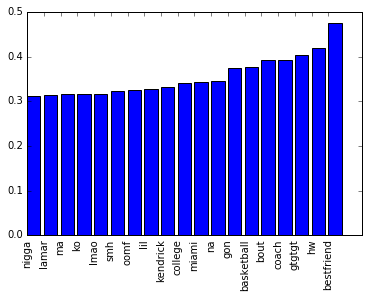

In [241]:
## Delete unwanted word
test = list(coef[0][ind])
# del test[-1]
# print(test)
ind = np.argpartition(coef[0], -20)[-20:]
ind = ind[np.argsort(coef[0][ind])]
print(ind)
vocab = vectorizer.vocabulary_
names = []
for name, index in vocab.items():
    if index in ind:
        names.append(name)
print(len(names))
x_ticks_labels = names
fig, ax = plt.subplots(1,1) 
ax.bar(range(len(names)),test)
ax.set_xticks(range(len(names)))
# Set ticks labels for x-axis
ax.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=10)
#plt.show()
plt.savefig('control', bbox_inches='tight')


## Accuracy of Logistic Regression

In [87]:
y_pred = logreg.predict(X_new_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_new_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.68


## Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[216,  11,   5],
       [ 53,  50,  12],
       [ 55,  15,  53]])

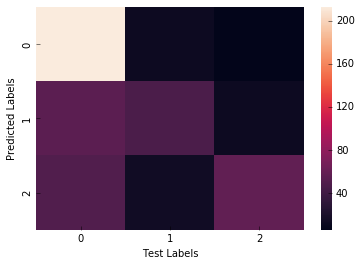

In [222]:
import seaborn as sns
import numpy
import matplotlib.pyplot as plt
xcm=confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)
xcm=numpy.array(xcm)
ax = sns.heatmap(xcm)
plt.xlabel('Test Labels')
plt.ylabel('Predicted Labels')
#plt.show()
plt.savefig('ConfusionMatrix')

## Naive Bayes

In [225]:
## Naive Bayes
from sklearn.naive_bayes import GaussianNB
#nb = cross_val_score(MultinomialNB(), X_new, y,cv=3)
#print("Naive Bayes average accuracy : ",nb.mean())
clf = GaussianNB().fit(X_new.toarray(), y)
y_pred = clf.predict(X_new_test.toarray())
print('Accuracy of Naive Bayes classifier on test set: {:.2f}'.format(clf.score(X_new_test.toarray(), y_test)))

Accuracy of Naive Bayes classifier on test set: 0.48
